# Project 1: Movies dataset analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
I have 3 main questions 

first : are there relation Between budget and quality of the movies 

second : what is the main reason for losing at the movies (budget> revune)

third : are the differnet geners provide different 

In [1]:
# this cell for import library 
import pandas as pd 
import numpy as np
import matplotlib as plt
import datetime
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

we import our library open the data and Explore it then clean it 

### General Properties

In [2]:
# Read the data from file and explore it 
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
# explore the data 
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


I print some numbers to see if the data contain non-logical values (ex :budget =0) 
then explore the distribution of some colmuns 

In [4]:
#define some function i need at these section
def showMeNum(num,colname):
    for i in num :
        print('number of movies with less than', i , colname ,len(df[df[colname] < i]))
        
def showMehist(num, cond, histcol):
    data = [] 
    mydf= pd.DataFrame(data, columns = num ) 
    for i in num :
        newdf=df[df[cond] < i]
        mydf[i]= newdf[histcol]
    axarr = mydf.hist(figsize=(8,8),sharex=True, sharey=True)

    for ax in axarr.flatten():
        ax.set_xlabel("vote_average")
        ax.set_ylabel("number of vote")
    
# check if there are budget with no sense        
print('number of movies with no logical budget',len(df[df['budget']<=0]))


number of movies with no logical budget 5696


As we can see more than half data (5696/10866 ) have missing budget 

In [5]:
# see the distribution of vote count
arr = [10,20,50,75,150,200]
showMeNum(arr,'vote_count')
print('number of movies with more than 1000 vote count',len(df[df['vote_count']>1000]))

number of movies with less than 10 vote_count 0
number of movies with less than 20 vote_count 3330
number of movies with less than 50 vote_count 6110
number of movies with less than 75 vote_count 6985
number of movies with less than 150 vote_count 8194
number of movies with less than 200 vote_count 8661
number of movies with more than 1000 vote count 563


we may think there are another problem as 33% of vote_count had realy low number (10-20) and 60% of data had (10-50) vote count which may lead to higher probelty in flase vote avg so we need to check if they had distribution similir to normal distribution 

these three to check histogram for differnt vote_count had differnt vote_average distribution 
each labe


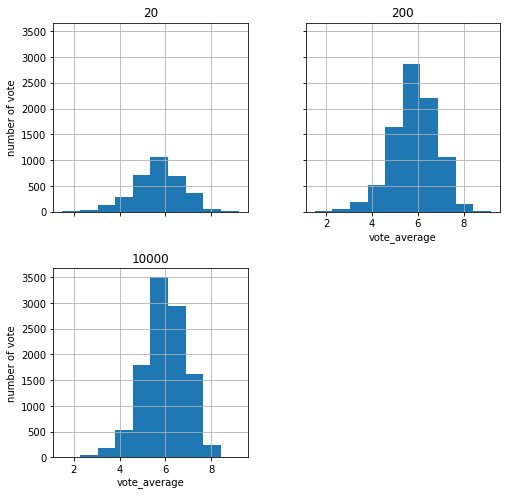

In [6]:
# see if the histogram for differnt vote_count had differnt vote_average distribution 
arr = [10000,200,20]
showMehist(arr,'vote_count','vote_average')
print("these three to check histogram for differnt vote_count had differnt vote_average distribution ")
print("each labe")

as we can see there are no huge differnce in distribution so Maybe it's ok However from logic sense low vote means that movies is worse than normal so the distribution of them maybe should be same distribution as normal BUT shifted to the Left 

In [7]:
# need to know if there are problem with runtime 
arr = [1,5,10,20,30,60]
showMeNum(arr,'runtime')

number of movies with less than 1 runtime 31
number of movies with less than 5 runtime 64
number of movies with less than 10 runtime 136
number of movies with less than 20 runtime 183
number of movies with less than 30 runtime 231
number of movies with less than 60 runtime 318


there are only 31 movies with no logical values (0) that is less than 1% of data so i think they will not cause any problem

In [8]:
#explore the values of data
years=np.array(df['release_year'].unique())
years.sort()
print('years of movies')
print(years)
print("losing movies nums;",len(df[df['budget']>df['revenue']]))

years of movies
[1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974
 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989
 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004
 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015]
losing movies nums; 2388


here we check for values but nothing wrong so next...

##### what I think about data:
first I think there are some missing or false data in budget because there are no sense in 0 budget same fo run time 
also I need to convert release_date to datetime
the mean of vote count is 217.389748 however there are so many movies with low vote count I think that mean movies
with low vote count had chance to get spam vote ( ex. someone who used to give one score for all movies)

### Data Cleaning 
remove some colmuns , remove na and duplicated ,convert the string to time 

In [9]:
#remove some colmuns 
df.drop(['id','imdb_id','original_title','homepage','tagline','overview','keywords','cast','director',
         'production_companies'],inplace=True, axis=1)
df.head()

,popularity,budget,revenue,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


I am just remove the colmuns i will not used at my analysis

In [10]:
#convert release_date from string to datetime  
df['release_date'] = pd.to_datetime(df['release_date'], format='%m/%d/%y')
df.info()
len(df[df['release_year'] != df['release_date'].dt.year])
# there are problem here , the problem happend bc of year less than 2000 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
popularity      10866 non-null float64
budget          10866 non-null int64
revenue         10866 non-null int64
runtime         10866 non-null int64
genres          10843 non-null object
release_date    10866 non-null datetime64[ns]
vote_count      10866 non-null int64
vote_average    10866 non-null float64
release_year    10866 non-null int64
budget_adj      10866 non-null float64
revenue_adj     10866 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(5), object(1)
memory usage: 933.9+ KB


331

In [11]:
#fix the problem by add -100 to any wrong values
idx = df[df['release_year'] != df['release_date'].dt.year].index
df.loc[idx,'release_date'] =  df.loc[idx,'release_date'] - pd.offsets.DateOffset(years=100)
df.info()
df[df['release_year'] != df['release_date'].dt.year]
# now all release_year  == release_date 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
popularity      10866 non-null float64
budget          10866 non-null int64
revenue         10866 non-null int64
runtime         10866 non-null int64
genres          10843 non-null object
release_date    10866 non-null datetime64[ns]
vote_count      10866 non-null int64
vote_average    10866 non-null float64
release_year    10866 non-null int64
budget_adj      10866 non-null float64
revenue_adj     10866 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(5), object(1)
memory usage: 933.9+ KB


,popularity,budget,revenue,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [12]:
# we don't need release_year anymore as release_date.dt.year have the same info 
df.drop(['release_year'],inplace=True, axis=1)
df.head()

,popularity,budget,revenue,runtime,genres,release_date,vote_count,vote_average,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,137,Action|Crime|Thriller,2015-04-01,2947,7.3,1.747999e+08,1.385749e+09


In [13]:
#finally we remove duplicates and Na from the data
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 10 columns):
popularity      10842 non-null float64
budget          10842 non-null int64
revenue         10842 non-null int64
runtime         10842 non-null int64
genres          10842 non-null object
release_date    10842 non-null datetime64[ns]
vote_count      10842 non-null int64
vote_average    10842 non-null float64
budget_adj      10842 non-null float64
revenue_adj     10842 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(4), object(1)
memory usage: 931.7+ KB


In [14]:
# this is the final data we work on it 
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
count,10842.000000,1.084200e+04,1.084200e+04,10842.000000,10842.000000,10842.000000,1.084200e+04,1.084200e+04
mean,0.647461,1.465531e+07,3.991138e+07,102.138443,217.823649,5.974064,1.758712e+07,5.147797e+07
std,1.001032,3.093971e+07,1.171179e+08,31.294612,576.180993,0.934257,3.433437e+07,1.447723e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,0.000000e+00,0.000000e+00
25%,0.208210,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,0.000000e+00,0.000000e+00
50%,0.384532,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,0.000000e+00,0.000000e+00
75%,0.715393,1.500000e+07,2.414118e+07,111.000000,146.000000,6.600000,2.092507e+07,3.387838e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,4.250000e+08,2.827124e+09


### summury for cleaning data 
I am realy not sure about remove the movies with  zero budget , I think this is not zero but nan but there are 
another usefull info at these row and I think replace 0 with the mean will make it worse as the major of data (more than half ) had 0 budget
for budget_adj and revenue_adj I keep them for compare over time if needed (compare old movies with the new ) else we will not need them
I remove all colmuns not needed and convert string into datetime then remove all na and duplicated values

<a id='eda'></a>
## Exploratory Data Analysis

as I mention in the intro I have 3 main questions 
first : are there relation Between budget and quality of the movies 
second : what is the main reason for losing at the movies (budget> revune)
third : are the differnet geners provide different 

for first Q : I will select only the movies with logical budget then plot the budget with the another proprties but the budget rnage is huge so i take log(budget) to look more clean 
for second Q : first select losing Movies then plot all propreties and comare numbers with the original data set (all movies) 
for third Q : extract the geners then for each geners select all data that match and explore it , print all info together so we can compare the data 

### Q1: are there any relation between budget and quality of the movies  ( popularity , vote_average or runtime )

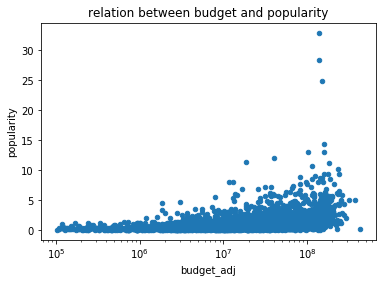

In [15]:
#first in this question we will work only on logical budget 
newdf = df[df['budget_adj'] > 100000]
# as we compare over time we use budget_adj instead of budget
# we plot the buget with the variables
# I mad logx because the x axis wasn't have clear range 
newdf.plot(x='budget_adj',y='popularity',kind='scatter',logx=True,title='relation between budget and popularity')

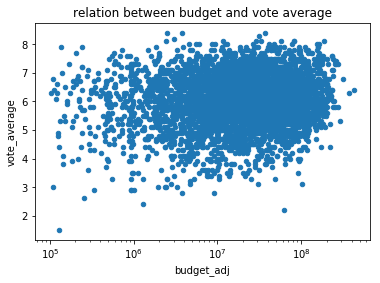

In [16]:
# we plot the buget with the variables
newdf.plot(x='budget_adj',y='vote_average',kind='scatter',logx=True,title='relation between budget and vote average')

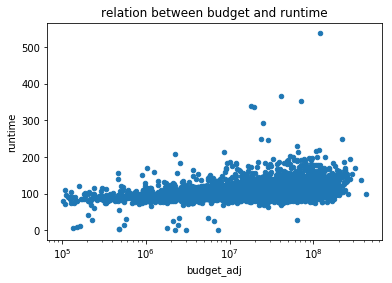

In [17]:
# we plot the buget with the variables
newdf.plot(x='budget_adj',y='runtime',kind='scatter',logx=True,title='relation between budget and runtime')

### Q1 summery
I tried to plot the budget with different variable so we can see any relation scatter type was the best option as they are both range values.
I used log(budget_adj ) instead of the budget so the X range will be more clear.
I only work on data with budget >0 as there are no movies in real life with 0 budget


As we can see the relation isn't clear so we can assume there are weak or no relation 
or to be accurate when budget inc there are higher probability that movie has more runtime and popularity

### Q2 :for that movies where they lost ( budget > revune ) what are the most common proprties 

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb690ab1080>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fb68ff94a20>]], dtype=object)

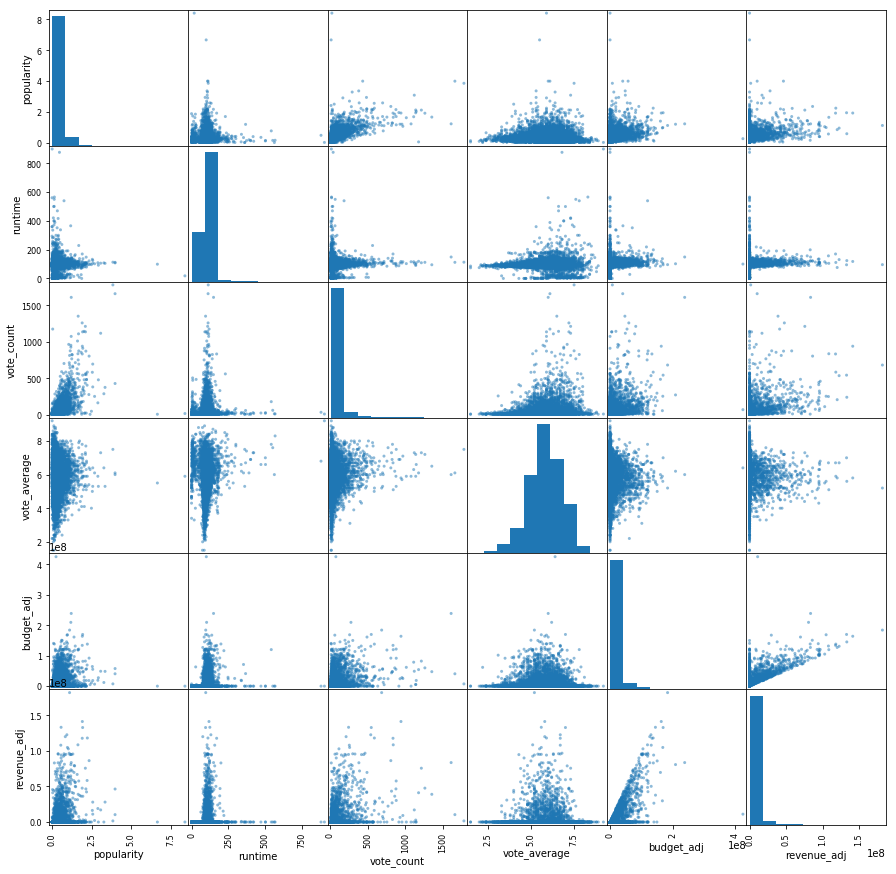

In [18]:
#first get the movies that lost 
newdf=df[df['budget']>=df['revenue']]
#remove some colmns that we don't need at this section 
newdf.drop(['revenue','budget','genres'],inplace=True, axis=1)
pd.plotting.scatter_matrix(newdf,figsize=(15,15))

I plot all varibles so I can see if there are any relation 

In [19]:
print(df.describe())
newdf.describe()

         popularity        budget       revenue       runtime    vote_count  \
count  10842.000000  1.084200e+04  1.084200e+04  10842.000000  10842.000000   
mean       0.647461  1.465531e+07  3.991138e+07    102.138443    217.823649   
std        1.001032  3.093971e+07  1.171179e+08     31.294612    576.180993   
min        0.000065  0.000000e+00  0.000000e+00      0.000000     10.000000   
25%        0.208210  0.000000e+00  0.000000e+00     90.000000     17.000000   
50%        0.384532  0.000000e+00  0.000000e+00     99.000000     38.000000   
75%        0.715393  1.500000e+07  2.414118e+07    111.000000    146.000000   
max       32.985763  4.250000e+08  2.781506e+09    900.000000   9767.000000   

       vote_average    budget_adj   revenue_adj  
count  10842.000000  1.084200e+04  1.084200e+04  
mean       5.974064  1.758712e+07  5.147797e+07  
std        0.934257  3.433437e+07  1.447723e+08  
min        1.500000  0.000000e+00  0.000000e+00  
25%        5.400000  0.000000e+00  0.0

,popularity,runtime,vote_count,vote_average,budget_adj,revenue_adj
count,7069.000000,7069.000000,7069.000000,7069.000000,7.069000e+03,7.069000e+03
mean,0.370133,98.842552,55.812986,5.834404,8.262919e+06,2.806129e+06
std,0.346810,34.948276,102.248062,0.977996,2.078000e+07,1.121296e+07
min,0.000065,0.000000,10.000000,1.500000,0.000000e+00,0.000000e+00
25%,0.162465,89.000000,14.000000,5.200000,0.000000e+00,0.000000e+00
50%,0.288098,96.000000,23.000000,5.900000,0.000000e+00,0.000000e+00
75%,0.471505,107.000000,52.000000,6.500000,4.748721e+06,0.000000e+00
max,8.411577,900.000000,1777.000000,9.200000,4.250000e+08,1.819387e+08


Compare number with the original 

### Q2 summery
compare it to the original dataset  we can say that 
. the losing movies isn't so bad as there vote avg isn't far from the normal 
BUT 
there are huge differance in budget , popularity ,vote_count and runtime 
as most of them are long movies (avg runtime is 90 min) but thier budget are about than normal ( but it's supposed to be larger as they are longer from pervious section )
so I think they aren't bad movies with low rating , they are just havn't money to ads the movies so it's has more popularity which lead to more revenue

### Q3 : are there any relation between geners and the rest of proprties 

In [20]:
#first get all genres
gen = set()
for x in df['genres']:
    newl=x.split('|')
    for i in newl:
        gen.add(i)

In [21]:
#now creat data frame to save all info about each geners       
newdata = {'genres': [],'count': [],'popularity':[],'budget_adj':[],'revenue_adj':[],
           'runtime':[],'vote_count':[],'vote_average':[]
        }
prop=['genres', 'count','popularity','budget_adj','revenue_adj','runtime','vote_count','vote_average']
mydata = pd.DataFrame(newdata, columns = prop)  

In [22]:
 # for each geners get all needed info 
for i in gen: 
    newdf=df[df['genres'].str.contains(i)]
    temp= newdf.describe().loc[['mean']]
    new_row = {'genres': i,'count': len(newdf) ,'popularity':temp['popularity'][0],'budget_adj':temp['budget_adj'][0],
               'revenue_adj':temp['revenue_adj'][0],'runtime':temp['runtime'][0],'vote_count':temp['vote_count'][0],
               'vote_average':temp['vote_average'][0]
        }
    mydata = mydata.append(new_row, ignore_index=True)
#sort and plot the data 
mydata.sort_values(by=['count', 'budget_adj'],inplace=True,ascending=False)
mydata

#another easy way to do the same (note for me )
#genres_df = df.assign(genres=df['genres'].str.split('|')).explode('genres')
#genres_df.groupby('genres').popularity.mean().plot.barh()

,genres,count,popularity,budget_adj,revenue_adj,runtime,vote_count,vote_average
0,Drama,4760.0,0.591495,1.485353e+07,4.041714e+07,110.478151,182.544538,6.165546
14,Comedy,3793.0,0.592607,1.592031e+07,4.789700e+07,96.745057,176.436330,5.905167
2,Thriller,2907.0,0.741563,2.068296e+07,5.528610e+07,103.247678,255.484348,5.750671
9,Action,2384.0,0.926274,3.296011e+07,9.175827e+07,104.917785,392.993708,5.787752
5,Romance,1712.0,0.592082,1.565922e+07,4.820022e+07,106.891355,166.070678,6.042874
11,Horror,1637.0,0.465357,7.764841e+06,2.408271e+07,94.424557,120.059866,5.337447
3,Adventure,1471.0,1.154259,4.393734e+07,1.416752e+08,106.173351,513.125085,5.940585
10,Crime,1354.0,0.744930,2.153351e+07,5.663641e+07,106.917282,278.805022,6.124889
6,Family,1231.0,0.786668,2.692389e+07,8.773671e+07,89.603574,272.320877,5.997563
17,Science Fiction,1229.0,1.001548,2.952429e+07,8.697842e+07,99.419854,437.096013,5.665582


### Q3 summery
as we see the most common geners is drama it's like half of Movies clssified as drama however that it hasn't any peak else
we notice that Documentary , TV Movie ,Foreign and Horror had lowest budget while Adventure and Fantasy had the highst that make sense when we see the most revenue is also these 2
Animation Movies have very low runtime compare to avg (102)
we also notice that there are huge differance in vote_count depend on geners so we can say that "there are realtion between  Geners and vote count that there are geners which viewers wnat to review more even if the movie isn't good "
for vote_average there are no big differnce between any geners and avg (5.96) exp for Documentary geners


<a id='conclusions'></a>
## Conclusions

so from these 3 Q I can tell 
most of people think there are strong relations between budget and success of the movie but as we see in the first Q the relation isn't that strong or we need more data about budget if we want to find this strong relation 
However from Q2 we can say that the main reason of lossing money in Movies is low budget which result in low popularity and of course that lead to less revenue
From Q3 we can say that the geners is matter in terms of number and each geners may have its unique property 

## limitation 
I think there are some main issues that should fix from the source
false data in budget (0 budget) should be fix as it affect on the whole process and clear the realtion more as we see the budget is strong proprties 
there are some repetion at the colmns (there are colmuns for year however this info is already in realse Date)
there are so many movies with low vote count which tell that maybe that vote isn't correct or accurate (33% of voting is between 10 and 20 person )

In [23]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0